In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib.axes import Axes

In [3]:
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None,
    names=[f"item_{idx}" for idx in range(1, 21)])

In [8]:
print(
    f"There were a total of {data.shape[0]:,} transactions, each containing"
    f" {data.shape[1]:,} items"
)
data.head()

There were a total of 7,501 transactions, each containing 20 items


,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.isnull().sum()

item_1        0
item_2     1754
item_3     3112
item_4     4156
item_5     4972
item_6     5637
item_7     6132
item_8     6520
item_9     6847
item_10    7106
item_11    7245
item_12    7347
item_13    7414
item_14    7454
item_15    7476
item_16    7493
item_17    7497
item_18    7497
item_19    7498
item_20    7500
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_1   7501 non-null   object
 1   item_2   5747 non-null   object
 2   item_3   4389 non-null   object
 3   item_4   3345 non-null   object
 4   item_5   2529 non-null   object
 5   item_6   1864 non-null   object
 6   item_7   1369 non-null   object
 7   item_8   981 non-null    object
 8   item_9   654 non-null    object
 9   item_10  395 non-null    object
 10  item_11  256 non-null    object
 11  item_12  154 non-null    object
 12  item_13  87 non-null     object
 13  item_14  47 non-null     object
 14  item_15  25 non-null     object
 15  item_16  8 non-null      object
 16  item_17  4 non-null      object
 17  item_18  4 non-null      object
 18  item_19  3 non-null      object
 19  item_20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


Cleaning

In [11]:
all_products = data.melt()["value"].dropna().sort_values()
all_products[all_products.str.contains("^\s|\s$")].to_list()

[' asparagus']

Identifying products

In [12]:
data.replace(" asparagus", "asparagus", inplace=True)
all_products.replace(" asparagus", "asparagus", inplace=True)

print(f"There are {all_products.nunique()} different products:\n\n", all_products.unique())

There are 119 different products:

 ['asparagus' 'almonds' 'antioxydant juice' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffi

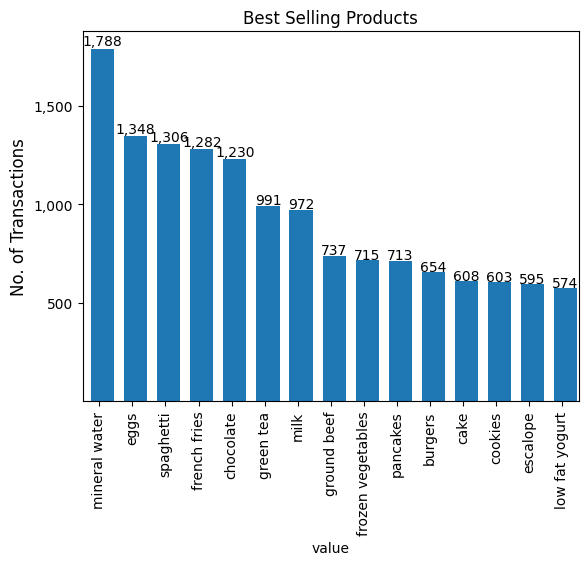

In [15]:
def annotate_column_chart(ax: Axes) -> Axes:
    for p in ax.patches:
        p.set_width(0.7)
        ax.annotate(f"{p.get_height():,}", ha="center",
                xy=(p.get_x() + p.get_width() / 2, p.get_height() * 1.01))
    return ax
item_counts = all_products.value_counts()

ax = item_counts.nlargest(15).plot(kind="bar", title="Best Selling Products")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

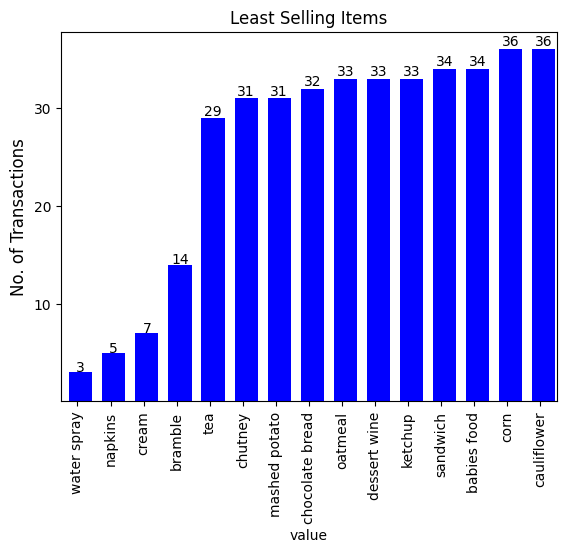

In [18]:
ax = item_counts.nsmallest(15).plot(kind="bar", color="blue", title="Least Selling Items")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([10, 20, 30]))

_ = annotate_column_chart(ax)

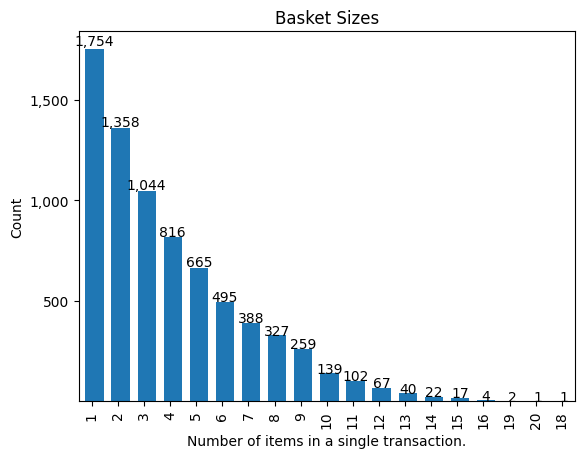

In [17]:
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar(title="Basket Sizes")
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

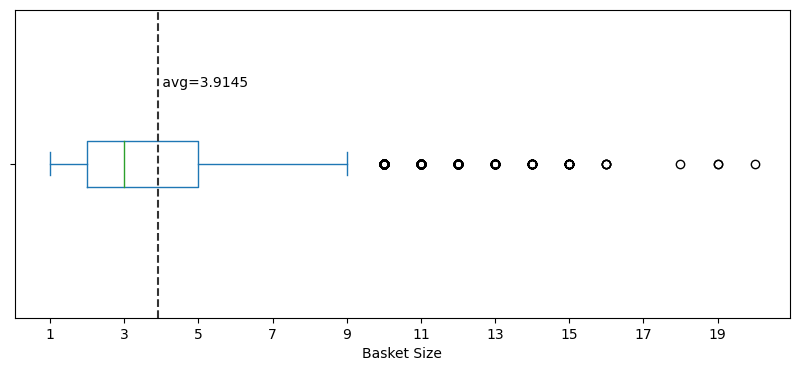

In [19]:
avg_basket_size = basket_sizes.mean()
ax = basket_sizes.plot.box(vert=False, figsize=(10, 4))
ax.axvline(avg_basket_size, 0, 1, linestyle="--", label="mean", color="#333")
ax.text(avg_basket_size, 1.25, f" avg={avg_basket_size:.4f}")
ax.set_xlabel("Basket Size")
ax.set_yticklabels([])
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(range(1, 21, 2)))

In [21]:
basket_sizes.describe()

count    7501.000000
mean        3.914545
std         2.905540
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        20.000000
dtype: float64

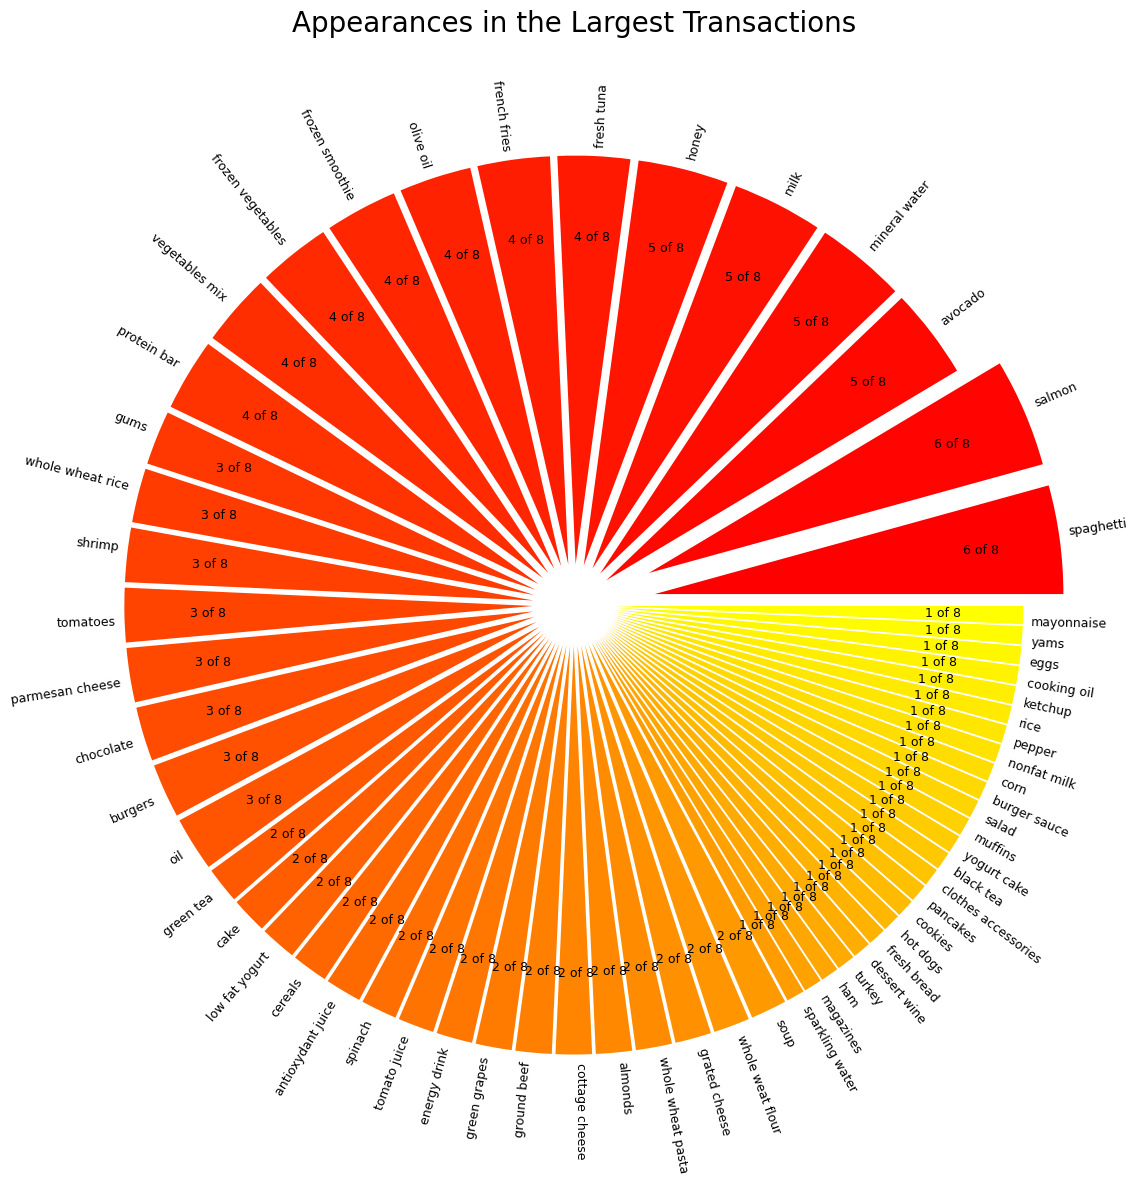

In [22]:
items_in_largest_transactions = data[basket_sizes > 15].melt()['value'].dropna()

pie_data = items_in_largest_transactions.value_counts()
ax = pie_data.plot.pie(
    cmap="autumn",
    explode=[0.2] * 2 + [0.1] * 59,
    figsize=(12, 12),
    autopct=lambda pct: f" {pct * 0.01 * pie_data.sum():.0f} of 8",
    pctdistance=0.8,
    labeldistance=1.02,
    rotatelabels=True,
    textprops={"size": 9},
)
ax.set_title("Appearances in the Largest Transactions", size=20, pad=45)
ax.set_ylabel("")
ax.figure.tight_layout()

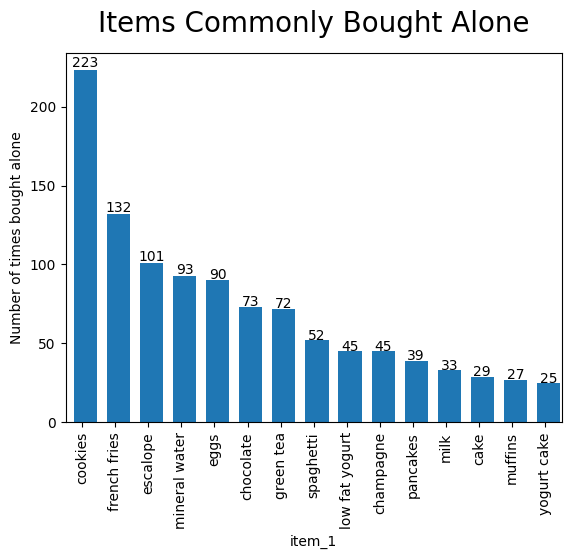

In [23]:
single_items = data[basket_sizes == 1]["item_1"].value_counts()
ax = single_items.head(15).plot.bar()
ax.set_title("Items Commonly Bought Alone", size=20, pad=15, weight=500)
ax.set_ylabel("Number of times bought alone")

_ = annotate_column_chart(ax)

In [29]:
!pip install apyori

In [27]:
dataframe_list=[]

for i in range(1,7501):
    dataframe_list.append([str(data.values[i,j]) for j in range(0,20)])

In [31]:
from apyori import apriori
association_rules = apriori(dataframe_list, min_support=0.0045, min_confidence=0.2,
                            min_lift=3, min_length=2)
association_results = list(association_rules)

In [32]:
association_results[1]

RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)])

In [33]:
Rule = []
Support = []
Confidence = []
Lift = []
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    Rule.append(items)
    Support.append(str(item[1]))
    Confidence.append(str(item[2][0][2]))
    Lift.append(str(item[2][0][3]))

In [35]:
dict = {'Rule': Rule, 'Support': Support, 'Confidence': Confidence, "Lift": Lift}
df = pd.DataFrame(dict)
df

,Rule,Support,Confidence,Lift
0,"[chicken, light cream]",0.004533333333333334,0.2905982905982906,4.843304843304844
1,"[escalope, mushroom cream sauce]",0.005733333333333333,0.30069930069930073,3.7903273197390845
2,"[escalope, pasta]",0.005866666666666667,0.37288135593220345,4.700185158809287
3,"[ground beef, herb & pepper]",0.016,0.3234501347708895,3.2915549671393096
4,"[ground beef, tomato sauce]",0.005333333333333333,0.37735849056603776,3.840147461662528
5,"[olive oil, whole wheat pasta]",0.008,0.2714932126696833,4.130221288078346
6,"[shrimp, pasta]",0.005066666666666666,0.3220338983050848,4.514493901473151
7,"[chicken, nan, light cream]",0.004533333333333334,0.2905982905982906,4.843304843304844
8,"[shrimp, frozen vegetables, chocolate]",0.005333333333333333,0.23255813953488372,3.260160834601174
9,"[ground beef, cooking oil, spaghetti]",0.0048,0.5714285714285714,3.281557646029315


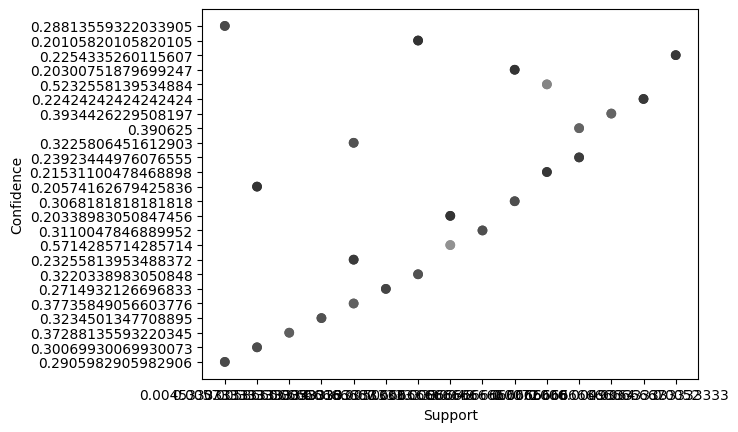

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['Support'], df['Confidence'], c=df['Confidence'])
plt.xlabel('Support')
_ = plt.ylabel('Confidence')